# INERZIA DISCO

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata

import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'disco.csv'
fr = pd.read_csv(FILE)

alfa1 = np.array(fr['Alfa1']) # lista rad/s^2
sigma_alfa1 = np.std(alfa1)
sigma_alfa1_media = sigma_alfa1/np.sqrt(len(alfa1))
w = np.array(fr['sigmaAlfa1'])
alfa1 = np.average(alfa1, weights=1/w**2)

alfa2 = np.array(fr['Alfa2']) # lista rad/s^2
sigma_alfa2 = np.std(alfa2)
sigma_alfa2_media = sigma_alfa2/np.sqrt(len(alfa2))
w = np.array(fr['sigmaAlfa2'])
alfa2 = np.average(alfa2, weights=1/w**2)

alfa3 = np.array(fr['Alfa3']) # lista deg/s^2
sigma_alfa3 = np.std(alfa3)
sigma_alfa3_media = sigma_alfa3/np.sqrt(len(alfa3))
w = np.array(fr['sigmaAlfa3'])
alfa3 = np.average(alfa3, weights=1/w**2)

m = np.array([50,70,85]) * 0.001
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2
raggio = 0.01 # m
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1_media,sigma_alfa2_media,sigma_alfa3_media])
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

r_disco = 0.05 #m
m_disco = 0.12 #Kg

### VERIFICA $\alpha \propto m$

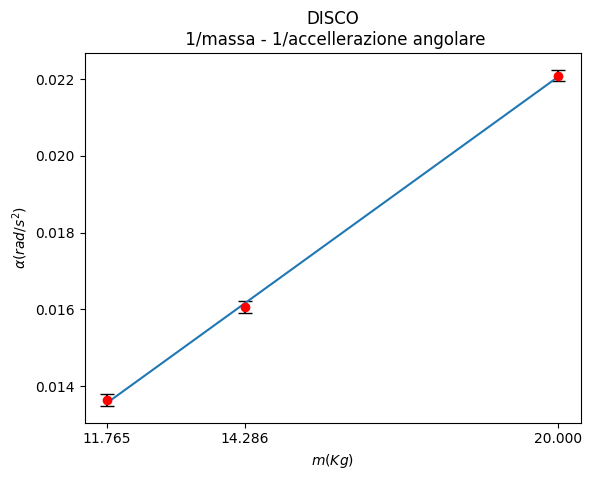


linearità A + BX
    
A: 0.0014391189887455805 
B: 0.0010309154470651942
sigmaA: 0.00034427938418468744
sigmaB: 2.1883982397048757e-05

sigmaY: [0.00015003 0.00016495 0.00015169]
chiquadro ridotto: 0.0
df: 1.5
    



In [16]:
r = RettaInterpolata(1/m, 1/alfa, sigma_alfa/alfa**2) #, sigma_alfa)
plt.errorbar(1/m,1/alfa,yerr=r.sigmaY,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.x_best,r.y_best)
plt.xticks(1/m)
# TODO: sistemare tersdto
plt.title("DISCO\n 1/massa - 1/accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
plt.show()

print(r)

### inerzia attesa

$I = \frac{1}{2} m r^2$

In [17]:
from interpolazione3 import decimal_val
I_disco_attesa = 0.5 * (r_disco ** 2) * m_disco
print('Inerzia disco attesa: ',decimal_val(I_disco_attesa,exp=-4), 'Kg m^2')

Inerzia disco attesa:  1.5e-4  Kg m^2


### inerzia misurata

In [18]:
from interpolazione3 import final_val
I = r.B * 8.31 * raggio
sigmaI = r.sigmaB * 8.31 * raggio # i sigmaB sono 3

print('Inerzia misurata disco: ',final_val(I,sigmaI,exp=-4))

Inerzia misurata disco:  (0.86 ± 0.02)e-4 
